## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import californiaDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset - Boston Housing 

In [5]:
#Parameters 
n_features = 8
n_samples= 20640
n_target = 1 

In [6]:
X,Y = californiaDataset.california_data()

       X1    X2        X3        X4      X5        X6     X7      X8      Y
0  8.3252  41.0  6.984127  1.023810   322.0  2.555556  37.88 -122.23  4.526
1  8.3014  21.0  6.238137  0.971880  2401.0  2.109842  37.86 -122.22  3.585
2  7.2574  52.0  8.288136  1.073446   496.0  2.802260  37.85 -122.24  3.521
3  5.6431  52.0  5.817352  1.073059   558.0  2.547945  37.85 -122.25  3.413
4  3.8462  52.0  6.281853  1.081081   565.0  2.181467  37.85 -122.25  3.422


In [7]:
#Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])

## Training Parameters 

In [8]:
batch_size = 5000
n_epochs = 100
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X,Y)

Learning rate set to 0.066055


0:	learn: 0.9629179	total: 49ms	remaining: 48.9s
1:	learn: 0.9301086	total: 51.1ms	remaining: 25.5s
2:	learn: 0.9005637	total: 53.1ms	remaining: 17.6s
3:	learn: 0.8720983	total: 55.3ms	remaining: 13.8s
4:	learn: 0.8467410	total: 57.2ms	remaining: 11.4s
5:	learn: 0.8226672	total: 59.2ms	remaining: 9.81s
6:	learn: 0.7994702	total: 61.2ms	remaining: 8.68s
7:	learn: 0.7784272	total: 63.2ms	remaining: 7.83s
8:	learn: 0.7602192	total: 65.3ms	remaining: 7.19s
9:	learn: 0.7412421	total: 67.3ms	remaining: 6.67s
10:	learn: 0.7247930	total: 69.3ms	remaining: 6.23s
11:	learn: 0.7089951	total: 71.3ms	remaining: 5.87s
12:	learn: 0.6951345	total: 73.3ms	remaining: 5.57s
13:	learn: 0.6809276	total: 75.2ms	remaining: 5.3s
14:	learn: 0.6692630	total: 77.2ms	remaining: 5.07s
15:	learn: 0.6588323	total: 79.1ms	remaining: 4.86s
16:	learn: 0.6472700	total: 81ms	remaining: 4.68s
17:	learn: 0.6379982	total: 82.9ms	remaining: 4.52s
18:	learn: 0.6294674	total: 85ms	remaining: 4.39s
19:	learn: 0.6193295	total: 8

58:	learn: 0.4840055	total: 162ms	remaining: 2.58s
59:	learn: 0.4824455	total: 164ms	remaining: 2.57s
60:	learn: 0.4809744	total: 166ms	remaining: 2.55s
61:	learn: 0.4801376	total: 168ms	remaining: 2.54s
62:	learn: 0.4792422	total: 170ms	remaining: 2.52s
63:	learn: 0.4780719	total: 171ms	remaining: 2.51s
64:	learn: 0.4771984	total: 173ms	remaining: 2.49s
65:	learn: 0.4759610	total: 175ms	remaining: 2.48s
66:	learn: 0.4750287	total: 177ms	remaining: 2.46s
67:	learn: 0.4740093	total: 179ms	remaining: 2.45s
68:	learn: 0.4732612	total: 181ms	remaining: 2.44s
69:	learn: 0.4727266	total: 182ms	remaining: 2.42s
70:	learn: 0.4716549	total: 184ms	remaining: 2.41s
71:	learn: 0.4709088	total: 186ms	remaining: 2.4s
72:	learn: 0.4697594	total: 188ms	remaining: 2.39s
73:	learn: 0.4690934	total: 190ms	remaining: 2.38s
74:	learn: 0.4680942	total: 192ms	remaining: 2.36s
75:	learn: 0.4672726	total: 193ms	remaining: 2.35s
76:	learn: 0.4664479	total: 195ms	remaining: 2.34s
77:	learn: 0.4656044	total: 197m

84:	learn: 0.4596603	total: 211ms	remaining: 2.27s
85:	learn: 0.4587835	total: 212ms	remaining: 2.26s
86:	learn: 0.4583577	total: 214ms	remaining: 2.25s
87:	learn: 0.4577999	total: 216ms	remaining: 2.24s
88:	learn: 0.4572657	total: 218ms	remaining: 2.23s
89:	learn: 0.4569360	total: 220ms	remaining: 2.22s
90:	learn: 0.4559969	total: 221ms	remaining: 2.21s
91:	learn: 0.4549716	total: 224ms	remaining: 2.21s
92:	learn: 0.4544919	total: 225ms	remaining: 2.2s
93:	learn: 0.4537693	total: 227ms	remaining: 2.19s
94:	learn: 0.4532673	total: 229ms	remaining: 2.18s
95:	learn: 0.4526987	total: 231ms	remaining: 2.17s
96:	learn: 0.4520952	total: 233ms	remaining: 2.17s
97:	learn: 0.4513919	total: 235ms	remaining: 2.16s
98:	learn: 0.4503747	total: 236ms	remaining: 2.15s
99:	learn: 0.4494783	total: 238ms	remaining: 2.14s
100:	learn: 0.4487329	total: 240ms	remaining: 2.14s
101:	learn: 0.4481325	total: 242ms	remaining: 2.13s
102:	learn: 0.4475445	total: 244ms	remaining: 2.12s
103:	learn: 0.4466014	total: 

146:	learn: 0.4268458	total: 327ms	remaining: 1.9s
147:	learn: 0.4264987	total: 329ms	remaining: 1.89s
148:	learn: 0.4262192	total: 331ms	remaining: 1.89s
149:	learn: 0.4257966	total: 333ms	remaining: 1.89s
150:	learn: 0.4253062	total: 335ms	remaining: 1.88s
151:	learn: 0.4247446	total: 336ms	remaining: 1.88s
152:	learn: 0.4237365	total: 338ms	remaining: 1.87s
153:	learn: 0.4233079	total: 343ms	remaining: 1.89s
154:	learn: 0.4228876	total: 345ms	remaining: 1.88s
155:	learn: 0.4225404	total: 347ms	remaining: 1.88s
156:	learn: 0.4222831	total: 350ms	remaining: 1.88s
157:	learn: 0.4218088	total: 352ms	remaining: 1.87s
158:	learn: 0.4213239	total: 354ms	remaining: 1.87s
159:	learn: 0.4210022	total: 356ms	remaining: 1.87s
160:	learn: 0.4201256	total: 358ms	remaining: 1.86s
161:	learn: 0.4197073	total: 360ms	remaining: 1.86s
162:	learn: 0.4192052	total: 361ms	remaining: 1.85s
163:	learn: 0.4187949	total: 363ms	remaining: 1.85s
164:	learn: 0.4184572	total: 365ms	remaining: 1.85s
165:	learn: 0

169:	learn: 0.4165960	total: 375ms	remaining: 1.83s
170:	learn: 0.4161870	total: 377ms	remaining: 1.83s
171:	learn: 0.4156228	total: 379ms	remaining: 1.82s
172:	learn: 0.4153041	total: 381ms	remaining: 1.82s
173:	learn: 0.4148857	total: 383ms	remaining: 1.82s
174:	learn: 0.4144190	total: 385ms	remaining: 1.81s
175:	learn: 0.4140875	total: 386ms	remaining: 1.81s
176:	learn: 0.4136755	total: 388ms	remaining: 1.8s
177:	learn: 0.4133860	total: 390ms	remaining: 1.8s
178:	learn: 0.4129780	total: 392ms	remaining: 1.79s
179:	learn: 0.4122907	total: 393ms	remaining: 1.79s
180:	learn: 0.4119188	total: 395ms	remaining: 1.79s
181:	learn: 0.4115412	total: 397ms	remaining: 1.78s
182:	learn: 0.4112620	total: 399ms	remaining: 1.78s
183:	learn: 0.4107734	total: 401ms	remaining: 1.78s
184:	learn: 0.4104881	total: 403ms	remaining: 1.77s
185:	learn: 0.4100009	total: 405ms	remaining: 1.77s
186:	learn: 0.4096453	total: 407ms	remaining: 1.77s
187:	learn: 0.4093395	total: 409ms	remaining: 1.76s
188:	learn: 0.

230:	learn: 0.3957018	total: 492ms	remaining: 1.64s
231:	learn: 0.3954162	total: 494ms	remaining: 1.64s
232:	learn: 0.3951665	total: 496ms	remaining: 1.63s
233:	learn: 0.3949269	total: 498ms	remaining: 1.63s
234:	learn: 0.3945894	total: 500ms	remaining: 1.63s
235:	learn: 0.3944181	total: 501ms	remaining: 1.62s
236:	learn: 0.3941497	total: 503ms	remaining: 1.62s
237:	learn: 0.3939819	total: 505ms	remaining: 1.62s
238:	learn: 0.3938322	total: 507ms	remaining: 1.61s
239:	learn: 0.3935463	total: 509ms	remaining: 1.61s
240:	learn: 0.3933166	total: 511ms	remaining: 1.61s
241:	learn: 0.3930992	total: 512ms	remaining: 1.6s
242:	learn: 0.3928898	total: 514ms	remaining: 1.6s
243:	learn: 0.3926199	total: 516ms	remaining: 1.6s
244:	learn: 0.3923955	total: 518ms	remaining: 1.6s
245:	learn: 0.3922312	total: 520ms	remaining: 1.59s
246:	learn: 0.3919499	total: 522ms	remaining: 1.59s
247:	learn: 0.3917420	total: 524ms	remaining: 1.59s
248:	learn: 0.3915186	total: 526ms	remaining: 1.58s
249:	learn: 0.39

255:	learn: 0.3896180	total: 539ms	remaining: 1.56s
256:	learn: 0.3894251	total: 541ms	remaining: 1.56s
257:	learn: 0.3892139	total: 543ms	remaining: 1.56s
258:	learn: 0.3889352	total: 545ms	remaining: 1.56s
259:	learn: 0.3886531	total: 547ms	remaining: 1.56s
260:	learn: 0.3884539	total: 549ms	remaining: 1.55s
261:	learn: 0.3882459	total: 551ms	remaining: 1.55s
262:	learn: 0.3881101	total: 552ms	remaining: 1.55s
263:	learn: 0.3879324	total: 554ms	remaining: 1.54s
264:	learn: 0.3876861	total: 556ms	remaining: 1.54s
265:	learn: 0.3874255	total: 558ms	remaining: 1.54s
266:	learn: 0.3868515	total: 560ms	remaining: 1.54s
267:	learn: 0.3866114	total: 562ms	remaining: 1.53s
268:	learn: 0.3863119	total: 564ms	remaining: 1.53s
269:	learn: 0.3860579	total: 566ms	remaining: 1.53s
270:	learn: 0.3858830	total: 568ms	remaining: 1.53s
271:	learn: 0.3857050	total: 569ms	remaining: 1.52s
272:	learn: 0.3855021	total: 571ms	remaining: 1.52s
273:	learn: 0.3852614	total: 573ms	remaining: 1.52s
274:	learn: 

317:	learn: 0.3762751	total: 656ms	remaining: 1.41s
318:	learn: 0.3761284	total: 658ms	remaining: 1.4s
319:	learn: 0.3760168	total: 659ms	remaining: 1.4s
320:	learn: 0.3757763	total: 661ms	remaining: 1.4s
321:	learn: 0.3756076	total: 663ms	remaining: 1.4s
322:	learn: 0.3754123	total: 665ms	remaining: 1.39s
323:	learn: 0.3751852	total: 667ms	remaining: 1.39s
324:	learn: 0.3750004	total: 669ms	remaining: 1.39s
325:	learn: 0.3749086	total: 671ms	remaining: 1.39s
326:	learn: 0.3746654	total: 672ms	remaining: 1.38s
327:	learn: 0.3745405	total: 674ms	remaining: 1.38s
328:	learn: 0.3743710	total: 676ms	remaining: 1.38s
329:	learn: 0.3741679	total: 678ms	remaining: 1.38s
330:	learn: 0.3738646	total: 680ms	remaining: 1.37s
331:	learn: 0.3736647	total: 682ms	remaining: 1.37s
332:	learn: 0.3733429	total: 684ms	remaining: 1.37s
333:	learn: 0.3732059	total: 686ms	remaining: 1.37s
334:	learn: 0.3730574	total: 688ms	remaining: 1.36s
335:	learn: 0.3728663	total: 689ms	remaining: 1.36s
336:	learn: 0.37

342:	learn: 0.3714592	total: 703ms	remaining: 1.35s
343:	learn: 0.3713389	total: 705ms	remaining: 1.34s
344:	learn: 0.3711642	total: 707ms	remaining: 1.34s
345:	learn: 0.3709569	total: 708ms	remaining: 1.34s
346:	learn: 0.3708184	total: 710ms	remaining: 1.34s
347:	learn: 0.3705958	total: 712ms	remaining: 1.33s
348:	learn: 0.3703798	total: 714ms	remaining: 1.33s
349:	learn: 0.3701923	total: 716ms	remaining: 1.33s
350:	learn: 0.3700067	total: 718ms	remaining: 1.33s
351:	learn: 0.3698930	total: 719ms	remaining: 1.32s
352:	learn: 0.3697314	total: 721ms	remaining: 1.32s
353:	learn: 0.3695617	total: 724ms	remaining: 1.32s
354:	learn: 0.3694397	total: 725ms	remaining: 1.32s
355:	learn: 0.3692589	total: 727ms	remaining: 1.31s
356:	learn: 0.3691107	total: 729ms	remaining: 1.31s
357:	learn: 0.3689645	total: 731ms	remaining: 1.31s
358:	learn: 0.3687886	total: 733ms	remaining: 1.31s
359:	learn: 0.3686485	total: 735ms	remaining: 1.31s
360:	learn: 0.3685749	total: 737ms	remaining: 1.3s
361:	learn: 0

405:	learn: 0.3613607	total: 821ms	remaining: 1.2s
406:	learn: 0.3612875	total: 823ms	remaining: 1.2s
407:	learn: 0.3611516	total: 825ms	remaining: 1.2s
408:	learn: 0.3609621	total: 827ms	remaining: 1.19s
409:	learn: 0.3608193	total: 829ms	remaining: 1.19s
410:	learn: 0.3604920	total: 831ms	remaining: 1.19s
411:	learn: 0.3603038	total: 833ms	remaining: 1.19s
412:	learn: 0.3602055	total: 834ms	remaining: 1.19s
413:	learn: 0.3599094	total: 836ms	remaining: 1.18s
414:	learn: 0.3597887	total: 838ms	remaining: 1.18s
415:	learn: 0.3595791	total: 840ms	remaining: 1.18s
416:	learn: 0.3594487	total: 842ms	remaining: 1.18s
417:	learn: 0.3592759	total: 844ms	remaining: 1.17s
418:	learn: 0.3591088	total: 846ms	remaining: 1.17s
419:	learn: 0.3589470	total: 848ms	remaining: 1.17s
420:	learn: 0.3587972	total: 849ms	remaining: 1.17s
421:	learn: 0.3586831	total: 851ms	remaining: 1.17s
422:	learn: 0.3585620	total: 853ms	remaining: 1.16s
423:	learn: 0.3584427	total: 855ms	remaining: 1.16s
424:	learn: 0.3

429:	learn: 0.3576138	total: 866ms	remaining: 1.15s
430:	learn: 0.3575528	total: 868ms	remaining: 1.15s
431:	learn: 0.3574686	total: 870ms	remaining: 1.14s
432:	learn: 0.3572923	total: 872ms	remaining: 1.14s
433:	learn: 0.3571859	total: 874ms	remaining: 1.14s
434:	learn: 0.3570185	total: 876ms	remaining: 1.14s
435:	learn: 0.3568416	total: 878ms	remaining: 1.14s
436:	learn: 0.3566846	total: 879ms	remaining: 1.13s
437:	learn: 0.3565875	total: 881ms	remaining: 1.13s
438:	learn: 0.3564768	total: 883ms	remaining: 1.13s
439:	learn: 0.3563559	total: 885ms	remaining: 1.13s
440:	learn: 0.3561557	total: 887ms	remaining: 1.12s
441:	learn: 0.3559793	total: 888ms	remaining: 1.12s
442:	learn: 0.3558695	total: 890ms	remaining: 1.12s
443:	learn: 0.3557039	total: 892ms	remaining: 1.12s
444:	learn: 0.3555934	total: 894ms	remaining: 1.11s
445:	learn: 0.3553700	total: 896ms	remaining: 1.11s
446:	learn: 0.3553048	total: 898ms	remaining: 1.11s
447:	learn: 0.3550824	total: 900ms	remaining: 1.11s
448:	learn: 

492:	learn: 0.3487285	total: 983ms	remaining: 1.01s
493:	learn: 0.3486318	total: 985ms	remaining: 1.01s
494:	learn: 0.3485016	total: 987ms	remaining: 1.01s
495:	learn: 0.3484072	total: 989ms	remaining: 1s
496:	learn: 0.3482698	total: 991ms	remaining: 1s
497:	learn: 0.3481630	total: 992ms	remaining: 1s
498:	learn: 0.3480855	total: 994ms	remaining: 998ms
499:	learn: 0.3478655	total: 996ms	remaining: 996ms
500:	learn: 0.3477966	total: 998ms	remaining: 994ms
501:	learn: 0.3476142	total: 1000ms	remaining: 992ms
502:	learn: 0.3474667	total: 1s	remaining: 990ms
503:	learn: 0.3473844	total: 1s	remaining: 988ms
504:	learn: 0.3471852	total: 1s	remaining: 985ms
505:	learn: 0.3471124	total: 1.01s	remaining: 983ms
506:	learn: 0.3469987	total: 1.01s	remaining: 981ms
507:	learn: 0.3469000	total: 1.01s	remaining: 979ms
508:	learn: 0.3467621	total: 1.01s	remaining: 977ms
509:	learn: 0.3466653	total: 1.01s	remaining: 975ms
510:	learn: 0.3465795	total: 1.02s	remaining: 972ms
511:	learn: 0.3464899	total: 

517:	learn: 0.3456145	total: 1.03s	remaining: 958ms
518:	learn: 0.3455174	total: 1.03s	remaining: 956ms
519:	learn: 0.3453867	total: 1.03s	remaining: 954ms
520:	learn: 0.3453067	total: 1.03s	remaining: 952ms
521:	learn: 0.3451017	total: 1.04s	remaining: 950ms
522:	learn: 0.3449560	total: 1.04s	remaining: 948ms
523:	learn: 0.3448379	total: 1.04s	remaining: 946ms
524:	learn: 0.3447174	total: 1.04s	remaining: 943ms
525:	learn: 0.3446114	total: 1.04s	remaining: 941ms
526:	learn: 0.3444940	total: 1.05s	remaining: 939ms
527:	learn: 0.3443508	total: 1.05s	remaining: 937ms
528:	learn: 0.3442153	total: 1.05s	remaining: 935ms
529:	learn: 0.3441108	total: 1.05s	remaining: 933ms
530:	learn: 0.3439546	total: 1.05s	remaining: 930ms
531:	learn: 0.3438254	total: 1.05s	remaining: 928ms
532:	learn: 0.3437049	total: 1.06s	remaining: 926ms
533:	learn: 0.3435053	total: 1.06s	remaining: 924ms
534:	learn: 0.3433236	total: 1.06s	remaining: 922ms
535:	learn: 0.3432219	total: 1.06s	remaining: 920ms
536:	learn: 

580:	learn: 0.3382469	total: 1.15s	remaining: 827ms
581:	learn: 0.3381645	total: 1.15s	remaining: 825ms
582:	learn: 0.3380538	total: 1.15s	remaining: 823ms
583:	learn: 0.3379690	total: 1.15s	remaining: 821ms
584:	learn: 0.3378924	total: 1.15s	remaining: 819ms
585:	learn: 0.3378307	total: 1.16s	remaining: 817ms
586:	learn: 0.3377186	total: 1.16s	remaining: 815ms
587:	learn: 0.3376434	total: 1.16s	remaining: 813ms
588:	learn: 0.3375696	total: 1.16s	remaining: 811ms
589:	learn: 0.3374902	total: 1.16s	remaining: 809ms
590:	learn: 0.3373056	total: 1.17s	remaining: 808ms
591:	learn: 0.3371913	total: 1.17s	remaining: 806ms
592:	learn: 0.3371272	total: 1.17s	remaining: 804ms
593:	learn: 0.3370368	total: 1.17s	remaining: 802ms
594:	learn: 0.3368150	total: 1.18s	remaining: 800ms
595:	learn: 0.3367491	total: 1.18s	remaining: 800ms
596:	learn: 0.3366496	total: 1.18s	remaining: 798ms
597:	learn: 0.3365561	total: 1.18s	remaining: 796ms
598:	learn: 0.3364801	total: 1.19s	remaining: 794ms
599:	learn: 

602:	learn: 0.3360683	total: 1.19s	remaining: 787ms
603:	learn: 0.3359807	total: 1.2s	remaining: 785ms
604:	learn: 0.3359096	total: 1.2s	remaining: 783ms
605:	learn: 0.3358268	total: 1.2s	remaining: 780ms
606:	learn: 0.3356597	total: 1.2s	remaining: 778ms
607:	learn: 0.3355448	total: 1.2s	remaining: 776ms
608:	learn: 0.3354512	total: 1.21s	remaining: 774ms
609:	learn: 0.3353398	total: 1.21s	remaining: 772ms
610:	learn: 0.3352669	total: 1.21s	remaining: 770ms
611:	learn: 0.3351716	total: 1.21s	remaining: 768ms
612:	learn: 0.3351155	total: 1.21s	remaining: 766ms
613:	learn: 0.3350041	total: 1.22s	remaining: 764ms
614:	learn: 0.3349098	total: 1.22s	remaining: 762ms
615:	learn: 0.3348304	total: 1.22s	remaining: 760ms
616:	learn: 0.3347009	total: 1.22s	remaining: 758ms
617:	learn: 0.3346458	total: 1.22s	remaining: 756ms
618:	learn: 0.3345381	total: 1.22s	remaining: 754ms
619:	learn: 0.3344101	total: 1.23s	remaining: 752ms
620:	learn: 0.3343267	total: 1.23s	remaining: 750ms
621:	learn: 0.334

664:	learn: 0.3296970	total: 1.31s	remaining: 662ms
665:	learn: 0.3296671	total: 1.31s	remaining: 660ms
666:	learn: 0.3295999	total: 1.32s	remaining: 658ms
667:	learn: 0.3295390	total: 1.32s	remaining: 656ms
668:	learn: 0.3294195	total: 1.32s	remaining: 654ms
669:	learn: 0.3293185	total: 1.32s	remaining: 652ms
670:	learn: 0.3292086	total: 1.32s	remaining: 650ms
671:	learn: 0.3289913	total: 1.33s	remaining: 648ms
672:	learn: 0.3288859	total: 1.33s	remaining: 646ms
673:	learn: 0.3288145	total: 1.33s	remaining: 644ms
674:	learn: 0.3286969	total: 1.33s	remaining: 642ms
675:	learn: 0.3286108	total: 1.33s	remaining: 640ms
676:	learn: 0.3285218	total: 1.34s	remaining: 638ms
677:	learn: 0.3284620	total: 1.34s	remaining: 636ms
678:	learn: 0.3283999	total: 1.34s	remaining: 634ms
679:	learn: 0.3283506	total: 1.34s	remaining: 632ms
680:	learn: 0.3282208	total: 1.34s	remaining: 630ms
681:	learn: 0.3281020	total: 1.35s	remaining: 628ms
682:	learn: 0.3280328	total: 1.35s	remaining: 626ms
683:	learn: 

688:	learn: 0.3275537	total: 1.36s	remaining: 615ms
689:	learn: 0.3274808	total: 1.36s	remaining: 613ms
690:	learn: 0.3273839	total: 1.36s	remaining: 611ms
691:	learn: 0.3272773	total: 1.37s	remaining: 609ms
692:	learn: 0.3272088	total: 1.37s	remaining: 607ms
693:	learn: 0.3271216	total: 1.37s	remaining: 605ms
694:	learn: 0.3270566	total: 1.37s	remaining: 603ms
695:	learn: 0.3269516	total: 1.38s	remaining: 601ms
696:	learn: 0.3267980	total: 1.38s	remaining: 599ms
697:	learn: 0.3266887	total: 1.38s	remaining: 597ms
698:	learn: 0.3265888	total: 1.38s	remaining: 595ms
699:	learn: 0.3265229	total: 1.38s	remaining: 593ms
700:	learn: 0.3264350	total: 1.38s	remaining: 591ms
701:	learn: 0.3263223	total: 1.39s	remaining: 589ms
702:	learn: 0.3262539	total: 1.39s	remaining: 586ms
703:	learn: 0.3261258	total: 1.39s	remaining: 584ms
704:	learn: 0.3260520	total: 1.39s	remaining: 582ms
705:	learn: 0.3259475	total: 1.39s	remaining: 580ms
706:	learn: 0.3258911	total: 1.4s	remaining: 578ms
707:	learn: 0

751:	learn: 0.3219897	total: 1.48s	remaining: 488ms
752:	learn: 0.3218990	total: 1.48s	remaining: 486ms
753:	learn: 0.3218179	total: 1.48s	remaining: 484ms
754:	learn: 0.3217323	total: 1.49s	remaining: 482ms
755:	learn: 0.3216617	total: 1.49s	remaining: 480ms
756:	learn: 0.3216090	total: 1.49s	remaining: 478ms
757:	learn: 0.3215306	total: 1.49s	remaining: 476ms
758:	learn: 0.3214274	total: 1.49s	remaining: 474ms
759:	learn: 0.3212014	total: 1.5s	remaining: 472ms
760:	learn: 0.3211190	total: 1.5s	remaining: 470ms
761:	learn: 0.3210312	total: 1.5s	remaining: 468ms
762:	learn: 0.3209495	total: 1.5s	remaining: 466ms
763:	learn: 0.3208564	total: 1.5s	remaining: 464ms
764:	learn: 0.3207911	total: 1.5s	remaining: 463ms
765:	learn: 0.3206643	total: 1.51s	remaining: 461ms
766:	learn: 0.3205891	total: 1.51s	remaining: 459ms
767:	learn: 0.3204765	total: 1.51s	remaining: 457ms
768:	learn: 0.3203840	total: 1.51s	remaining: 455ms
769:	learn: 0.3203086	total: 1.51s	remaining: 453ms
770:	learn: 0.3202

775:	learn: 0.3198135	total: 1.53s	remaining: 441ms
776:	learn: 0.3197430	total: 1.53s	remaining: 439ms
777:	learn: 0.3196478	total: 1.53s	remaining: 437ms
778:	learn: 0.3194714	total: 1.53s	remaining: 435ms
779:	learn: 0.3194042	total: 1.53s	remaining: 433ms
780:	learn: 0.3193209	total: 1.54s	remaining: 431ms
781:	learn: 0.3192009	total: 1.54s	remaining: 429ms
782:	learn: 0.3191109	total: 1.54s	remaining: 427ms
783:	learn: 0.3190255	total: 1.54s	remaining: 425ms
784:	learn: 0.3189403	total: 1.54s	remaining: 423ms
785:	learn: 0.3188715	total: 1.54s	remaining: 421ms
786:	learn: 0.3188016	total: 1.55s	remaining: 419ms
787:	learn: 0.3187670	total: 1.55s	remaining: 417ms
788:	learn: 0.3186601	total: 1.55s	remaining: 415ms
789:	learn: 0.3185886	total: 1.55s	remaining: 413ms
790:	learn: 0.3185418	total: 1.55s	remaining: 411ms
791:	learn: 0.3184514	total: 1.56s	remaining: 409ms
792:	learn: 0.3183529	total: 1.56s	remaining: 407ms
793:	learn: 0.3182569	total: 1.56s	remaining: 405ms
794:	learn: 

837:	learn: 0.3147022	total: 1.64s	remaining: 318ms
838:	learn: 0.3145737	total: 1.65s	remaining: 316ms
839:	learn: 0.3144908	total: 1.65s	remaining: 314ms
840:	learn: 0.3144038	total: 1.65s	remaining: 312ms
841:	learn: 0.3143434	total: 1.65s	remaining: 310ms
842:	learn: 0.3142662	total: 1.65s	remaining: 308ms
843:	learn: 0.3141532	total: 1.65s	remaining: 306ms
844:	learn: 0.3140919	total: 1.66s	remaining: 304ms
845:	learn: 0.3140384	total: 1.66s	remaining: 302ms
846:	learn: 0.3139822	total: 1.66s	remaining: 300ms
847:	learn: 0.3138839	total: 1.66s	remaining: 298ms
848:	learn: 0.3138291	total: 1.66s	remaining: 296ms
849:	learn: 0.3137772	total: 1.67s	remaining: 294ms
850:	learn: 0.3137138	total: 1.67s	remaining: 292ms
851:	learn: 0.3136859	total: 1.67s	remaining: 290ms
852:	learn: 0.3136054	total: 1.67s	remaining: 288ms
853:	learn: 0.3135239	total: 1.67s	remaining: 286ms
854:	learn: 0.3134711	total: 1.67s	remaining: 284ms
855:	learn: 0.3134242	total: 1.68s	remaining: 282ms
856:	learn: 

862:	learn: 0.3127812	total: 1.69s	remaining: 268ms
863:	learn: 0.3126884	total: 1.69s	remaining: 266ms
864:	learn: 0.3126358	total: 1.69s	remaining: 264ms
865:	learn: 0.3125933	total: 1.7s	remaining: 263ms
866:	learn: 0.3125160	total: 1.7s	remaining: 261ms
867:	learn: 0.3124401	total: 1.7s	remaining: 259ms
868:	learn: 0.3123064	total: 1.7s	remaining: 257ms
869:	learn: 0.3122328	total: 1.7s	remaining: 255ms
870:	learn: 0.3121623	total: 1.71s	remaining: 253ms
871:	learn: 0.3121072	total: 1.71s	remaining: 251ms
872:	learn: 0.3120356	total: 1.71s	remaining: 249ms
873:	learn: 0.3119020	total: 1.71s	remaining: 247ms
874:	learn: 0.3118603	total: 1.71s	remaining: 245ms
875:	learn: 0.3117861	total: 1.72s	remaining: 243ms
876:	learn: 0.3116810	total: 1.72s	remaining: 241ms
877:	learn: 0.3116088	total: 1.72s	remaining: 239ms
878:	learn: 0.3115190	total: 1.72s	remaining: 237ms
879:	learn: 0.3114687	total: 1.72s	remaining: 235ms
880:	learn: 0.3113934	total: 1.72s	remaining: 233ms
881:	learn: 0.311

924:	learn: 0.3082889	total: 1.8s	remaining: 146ms
925:	learn: 0.3081901	total: 1.81s	remaining: 144ms
926:	learn: 0.3081106	total: 1.81s	remaining: 143ms
927:	learn: 0.3080422	total: 1.81s	remaining: 141ms
928:	learn: 0.3079770	total: 1.81s	remaining: 139ms
929:	learn: 0.3079316	total: 1.81s	remaining: 137ms
930:	learn: 0.3078660	total: 1.82s	remaining: 135ms
931:	learn: 0.3078147	total: 1.82s	remaining: 133ms
932:	learn: 0.3077165	total: 1.82s	remaining: 131ms
933:	learn: 0.3076207	total: 1.82s	remaining: 129ms
934:	learn: 0.3075333	total: 1.82s	remaining: 127ms
935:	learn: 0.3074829	total: 1.83s	remaining: 125ms
936:	learn: 0.3074088	total: 1.83s	remaining: 123ms
937:	learn: 0.3073356	total: 1.83s	remaining: 121ms
938:	learn: 0.3072158	total: 1.83s	remaining: 119ms
939:	learn: 0.3071693	total: 1.83s	remaining: 117ms
940:	learn: 0.3071043	total: 1.84s	remaining: 115ms
941:	learn: 0.3070506	total: 1.84s	remaining: 113ms
942:	learn: 0.3070046	total: 1.84s	remaining: 111ms
943:	learn: 0

948:	learn: 0.3066014	total: 1.85s	remaining: 99.7ms
949:	learn: 0.3065250	total: 1.86s	remaining: 97.8ms
950:	learn: 0.3064465	total: 1.86s	remaining: 95.8ms
951:	learn: 0.3063837	total: 1.86s	remaining: 93.9ms
952:	learn: 0.3063292	total: 1.86s	remaining: 91.9ms
953:	learn: 0.3062107	total: 1.86s	remaining: 89.9ms
954:	learn: 0.3061348	total: 1.87s	remaining: 88ms
955:	learn: 0.3060576	total: 1.87s	remaining: 86ms
956:	learn: 0.3059772	total: 1.87s	remaining: 84.1ms
957:	learn: 0.3058989	total: 1.87s	remaining: 82.1ms
958:	learn: 0.3057985	total: 1.87s	remaining: 80.1ms
959:	learn: 0.3056692	total: 1.88s	remaining: 78.2ms
960:	learn: 0.3055777	total: 1.88s	remaining: 76.2ms
961:	learn: 0.3054462	total: 1.88s	remaining: 74.3ms
962:	learn: 0.3053516	total: 1.88s	remaining: 72.3ms
963:	learn: 0.3052664	total: 1.88s	remaining: 70.4ms
964:	learn: 0.3052264	total: 1.89s	remaining: 68.4ms
965:	learn: 0.3051873	total: 1.89s	remaining: 66.5ms
966:	learn: 0.3051018	total: 1.89s	remaining: 64.5

# ABC - GAN Model with skip connection

In [10]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.1, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.1, betas=(0.5, 0.999))


In [11]:
discLossA3,genLossA3 = ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_3 Generator Loss",genLossA3)
sb.glue("ABC_GAN_3 Discriminator Loss",discLossA3)

In [12]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
6157606.544352248


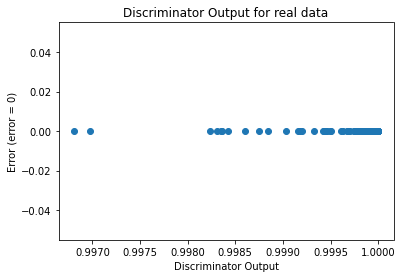

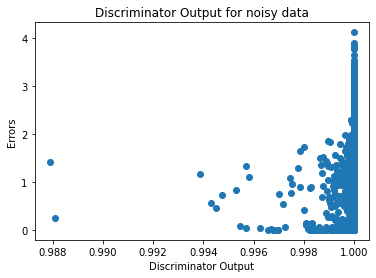

In [13]:
sanityChecks.discProbVsError(real_dataset,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [14]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1040]], device='cuda:0', requires_grad=True)
